### Beispiel: Eine Klasse in Python

In [1]:
import math
import random
import matplotlib.pyplot as plt

### Die vordefinierte Klasse ```list```.
- mit ```l = list((1,2))``` wird ein neues Objekt vom Typ ```list``` erstellt und der Variable ```l``` zugewiesen.
- ebenso: ```l = [1,2]``` 
- Die Klasse ```list``` hat eine Methode append und eine Methode ```__add__```
  - ```list.append(l,'neu')``` f&uuml;gt den String ```'neu'``` zur Liste hinzu
  - ```l.append('neu')``` ruft ```list.append(l,'neu')``` aus
  - ```l + l``` ruft ```list.__add__(l,l)``` auf
- Dieser Machanismus erlaut es allen Instanzen der Klasse ```list``` auf die in dieser Klasse implementierten Methoden zu benutzen.

In [91]:
print(list)
print(type([]))
print(isinstance([], list))
print(list.append)
print(list.__add__)
help(list.append)
help(list.__add__)

<class 'list'>
<class 'list'>
True
<method 'append' of 'list' objects>
<slot wrapper '__add__' of 'list' objects>
Help on method_descriptor:

append(self, object, /)
    Append object to the end of the list.

Help on wrapper_descriptor:

__add__(self, value, /)
    Return self+value.



In [89]:
l1 = list((1,2)) # neue Liste erstellen und l1 zuweisen
                 # l1 ist eine Instanz von Liste
l2 = [4,5]       # andere Art, eine Liste zu erstellen
list.append(l1, 'drei') # neues Objekt hinzufuegen
l2.append('sechs') # andere Art, neues Objekt hinzufuegen
                   # ruft list.append(l2,'sechs') aus
    
print(l1, l2)
l1 + l2           # Listen konkatenieren

[1, 2, 'drei'] [4, 5, 'sechs']


[1, 2, 'drei', 4, 5, 'sechs']

In [88]:
print(l1 + l2)
print(list.__add__(l1, l2))

[1, 2, 'drei', 4, 5, 'sechs']
[1, 2, 'drei', 4, 5, 'sechs']


### Eigene Klasse Vec (2-dim Vector) erstellen
- Konstruktor definieren: Funktion ```__init(self,...)```
- Methoden definieren: z.B. eine Funktion rotate(self,angle)
- ist ```x=Vec(1,2)``` ein Vector, so bewirkt der Aufruf ```x.rotate(30)```
  das Vec(x,30) ausgef&uuml;hrt wird.<br>
- Alle Instanzen von Vec haben so zugriff auf die
  Methode ```Vec.rotate```

In [52]:
class Vec(object):
    """A 2 dimensional vector class.
       implements the operations +,-,* on vectors, 
       and multiplication of vectors with numbers
       
       attributes:
           self.x: x-coordinate of self
           self.y: y-coordinate of self
    """
    
    def __init__(self, x, y):
        '''creates a Vector with coordinates (x,y)'''
        self.x = x
        self.y = y
        
    def rotate(self, angle):
        '''rotates the vector self around the origin by angle degrees
           returns the resulting vector
        '''
        a = math.pi*angle/180
        c = math.cos(a)
        s = math.sin(a)
        return Vec(c*self.x-s*self.y, s*self.x+c*self.y)
        
    def __add__(self, other):
        '''add the vectors self and other componentwise'''
        return Vec(self.x+other.x, self.y+other.y)    
    
    def __sub__(self, other):
        return Vec(self.x-other.x, self.y-other.y)    
    
    def __mul__(self, other):
        '''if self and other are Vectors: return scalar product
           if other is a number: return scalar multiplication
        '''
        if isinstance(other, Vec):
            return self.x*other.x + self.y*other.y   
        elif isinstance(other,int) or isinstance(other,float):    
            return Vec(self.x*other, self.y*other)   
        
    def __rmul__(self, other):  
        '''implements other*self, if self is a number'''
        return self*other
    
    def __repr__(self):
        return 'Vec({:.2f}, {:.2f})'.format(self.x, self.y)   

In [54]:
# help(Vec)

In [58]:
a=Vec(1,2)
b=Vec(3,3)
print(a, a.x, a.y)
print(a.rotate(90))
print(a*b, 10*a, a*10)

Vec(1.00, 2.00) 1 2
Vec(-2.00, 1.00)
9 Vec(10.00, 20.00) Vec(10.00, 20.00)


In [49]:
def plot(x, y):
    '''plots the points (x[0],y[0]), (x[1],y[1]),... if scatteris True,
       else the these points are connected
    '''   
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)
    ax.axis('equal')
    
    ax.scatter(x,y) #

In [50]:
# einige Konstanten
R  = 50           # Radius
O  = Vec(100,100) # Ursprung des Koordinatensystems
E1 = Vec(1,0)     # Vector der zum Punkt (1,0) zeigt

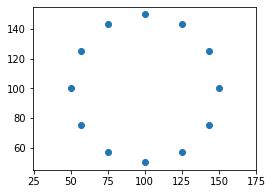

In [51]:
x = [] # Liste zum Speichern der x-Koordinaten der Punkte
y = [] # Liste zum Speichern der y-Koordinaten der Punkte

for alpha in range(0,360,30): # alpha durchlaeuft 0,30,...,330.
    v  = R * E1.rotate(alpha) # E1 wird rotiert, dann gestreckt
    pt = O + v                # v wird nach O verschoben
    x.append(pt.x)            # x-Koordinate von pt zur Liste x 
                              # hinzufuegen
    y.append(pt.y)            # y-Koordinate von pt zur Liste x 
                              # hinzufuegen

plot(x, y)    